# Import Library and Dataset

In [2]:
import matplotlib.pyplot as plt
import matplotlib as pt
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
url = 'https://raw.githubusercontent.com/Gitroars/BS_FoDS_Project/main/Dataset/Top_100_most_Streamed_-_Sheet1.csv'
df = pd.read_csv(url)
df

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56


# DATA MUNGING 

In [4]:
df.info

<bound method DataFrame.info of                                   title         artist  \
0                       Blinding Lights     The Weeknd   
1                      Watermelon Sugar   Harry Styles   
2                Mood (feat. iann dior)       24kGoldn   
3                     Someone You Loved  Lewis Capaldi   
4                               Perfect     Ed Sheeran   
..                                  ...            ...   
95                            One Dance          Drake   
96                                Sugar       Maroon 5   
97                             Emotions     Mark Mendy   
98                           Cold Water    Major Lazer   
99  I Took A Pill In Ibiza - Seeb Remix    Mike Posner   

                    top genre  year  beats.per.minute  energy  danceability  \
0   canadian contemporary r&b  2020               171      73            51   
1                         pop  2019                95      82            55   
2                    cali rap  202

In [5]:
df.rename(columns = {'top genre':'top_genre'}, inplace = True)

In [6]:
df.top_genre.value_counts()

dance pop                    28
pop                          11
dfw rap                       7
modern rock                   6
canadian pop                  6
canadian contemporary r&b     4
electropop                    4
melodic rap                   3
latin                         2
folk-pop                      2
canadian hip hop              2
emo rap                       2
rap                           2
north carolina hip hop        1
boy band                      1
detroit hip hop               1
electro house                 1
australian dance              1
beatlesque                    1
cali rap                      1
danish pop                    1
acoustic pop                  1
lgbtq+ hip hop                1
gangster rap                  1
chicago rap                   1
australian pop                1
alternative rock              1
conscious hip hop             1
classic rock                  1
neo soul                      1
pop rap                       1
brostep 

In [7]:
df.head()

,title,artist,top_genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


In [8]:
df.tail()

,title,artist,top_genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56
99,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,dance pop,2016,102,73,67,-7,9,66,198,3,10,53


In [9]:
df.describe()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,2015.960000,116.970000,62.680000,66.96000,-6.100000,16.860000,49.970000,214.530000,24.95000,9.930000,79.670000
std,5.327497,27.470629,16.491737,13.60401,1.987334,12.972403,21.737857,35.934974,26.27876,9.424077,5.905065
min,1975.000000,71.000000,11.000000,35.00000,-14.000000,3.000000,6.000000,119.000000,0.00000,2.000000,53.000000
25%,2015.000000,95.000000,52.000000,59.00000,-7.000000,10.000000,33.750000,190.500000,4.00000,4.000000,79.000000
50%,2017.000000,115.000000,64.500000,69.00000,-6.000000,12.000000,48.000000,210.000000,13.00000,6.000000,81.000000
75%,2018.000000,135.250000,76.000000,77.00000,-5.000000,17.250000,66.000000,234.250000,41.50000,11.000000,83.000000
max,2021.000000,186.000000,92.000000,91.00000,-3.000000,79.000000,93.000000,354.000000,98.00000,46.000000,91.000000


In [10]:
df.isnull().sum()

title               0
artist              0
top_genre           0
year                0
beats.per.minute    0
energy              0
danceability        0
loudness.dB         0
liveness            0
valance             0
length              0
acousticness        0
speechiness         0
popularity          0
dtype: int64

In [11]:
df.isnull().values.any()

False

In [12]:
df2 = df.dropna()

In [13]:
print(df2.dtypes)
print(df.dtypes)

title               object
artist              object
top_genre           object
year                 int64
beats.per.minute     int64
energy               int64
danceability         int64
loudness.dB          int64
liveness             int64
valance              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object
title               object
artist              object
top_genre           object
year                 int64
beats.per.minute     int64
energy               int64
danceability         int64
loudness.dB          int64
liveness             int64
valance              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object


In [14]:
df2.isnull().values.any()

False

C:\Users\Harris\AppData\Local\Temp\ipykernel_24560\1441594836.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=.3, center=0,


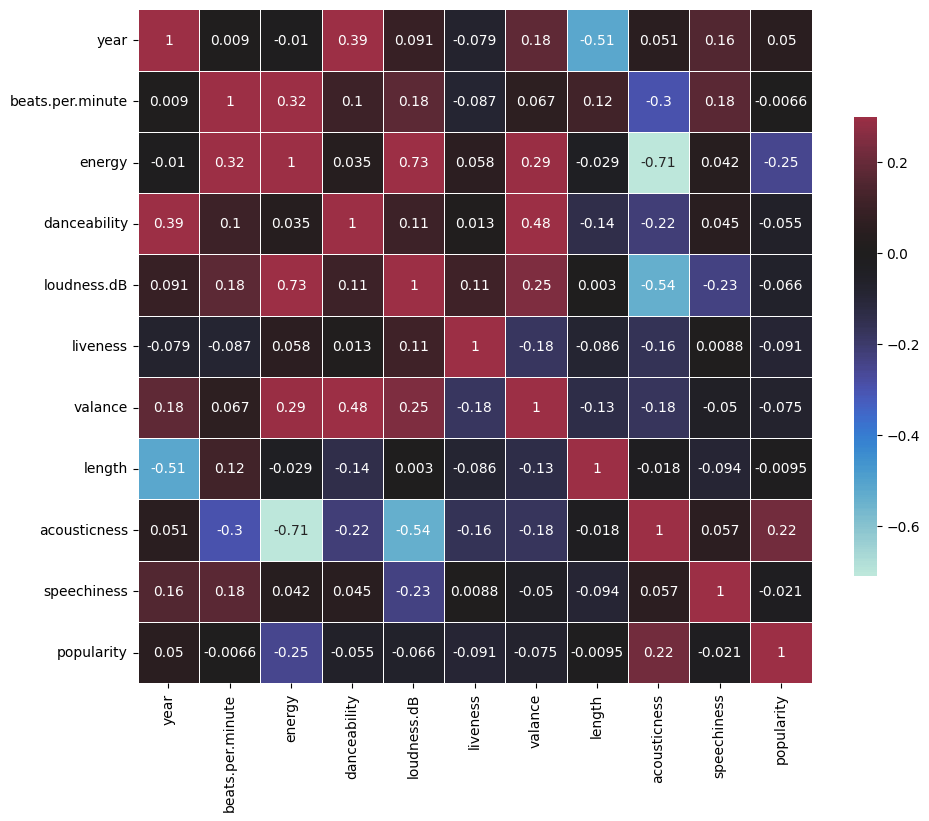

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

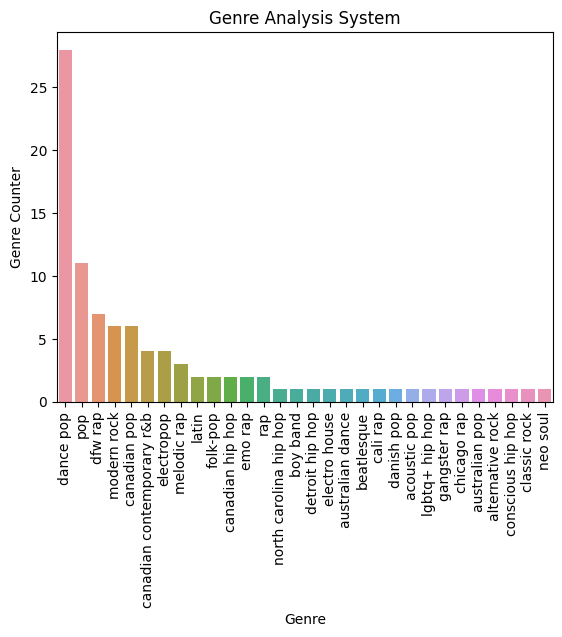

In [16]:
# Print variance age data from dataset
sns.barplot(x=df2.top_genre.value_counts()[:30].index,y=df.top_genre.value_counts()[:30].values)
plt.xlabel('Genre')
plt.ylabel('Genre Counter')
plt.title('Genre Analysis System')
plt.rcParams["figure.figsize"] = (15, 20)
plt.rcParams["xtick.labelsize"] = 8
plt.xticks(rotation=90)
plt.show()

In [17]:
# #add new column 'GenreRange' into dataset and normalize the data
# df2['Genre_Range']=0
# year1_index=df2[(df2.year<=2015)].index 
# year2_index=df2[(df2.year>=2016) & (df2.year<=2018)].index
# year3_index=df2[(df2.year>2018)].index
# for index in year3_index:
#     df2.loc[index,'Genre_Range']=2
    
# for index in year2_index:
#     df2.loc[index,'Genre_Range']=1

# for index in year1_index:
#     df2.loc[index,'Genre_Range']=0

# # Draw a categorical scatterplot to show each observation
# sns.swarmplot(x="Genre_Range", y="year",hue='top_genre',
#                palette=["red", "cyan", "red","red","cyan","red","cyan","red","red","red","red","red","red","cyan","cyan",
#                         "red","red","red","red","red","red","cyan","red","cyan","cyan","red","cyan","cyan","red","red","red",
#                         "red","red","cyan"], data=df2)
# plt.show()

# GROUPING THE GENRE

In [18]:
values = ['canadian contemporary r&b','latin', 'electro house','australian dance','beatlesque','neo soul','brostep','irish singer-songwriter']
df2 = df2[df2.top_genre.isin(values) == False]
# Change genre into numeric value
df2['genre_class'] = 0
#Maingroup
#Pop Class
df2.loc[df2.top_genre == 'dance pop','genre_class'] = 0
df2.loc[df2.top_genre == 'pop','genre_class'] = 0
df2.loc[df2.top_genre == 'canadian pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'electropop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'folk-pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'danish pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'acoustic pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'australian pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'pop dance','genre_class'] = 0
df2.loc[df2.top_genre == 'boy band', 'genre_class'] = 0
#Rap Class
df2.loc[df2.top_genre == 'dfw rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'melodic rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'emo rap','genre_class'] = 1
df2.loc[df2.top_genre == 'rap','genre_class'] = 1
df2.loc[df2.top_genre == 'cali rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'gangster rap','genre_class'] = 1
df2.loc[df2.top_genre == 'chicago rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'pop rap', 'genre_class'] = 1
#Rock Class
df2.loc[df2.top_genre == 'modern rock', 'genre_class'] = 2
df2.loc[df2.top_genre == 'alternative rock', 'genre_class'] = 2
#Hip Hop Class
df2.loc[df2.top_genre == 'canadian hip hop', 'genre_class'] = 3 
df2.loc[df2.top_genre == 'north carolina hip hop', 'genre_class'] = 3
df2.loc[df2.top_genre == 'detroit hip hop', 'genre_class'] = 3
df2.loc[df2.top_genre == 'lgbtq+ hip hop','genre_class'] = 3
df2.loc[df2.top_genre == 'conscious hip hop', 'genre_class'] = 3



#Group for all genre
# df2.loc[df2.top_genre == 'dance pop','genre_class'] = 0
# df2.loc[df2.top_genre == 'pop','genre_class'] = 1
# df2.loc[df2.top_genre == 'dfw rap', 'genre_class'] = 2
# df2.loc[df2.top_genre == 'modern rock', 'genre_class'] = 3
# df2.loc[df2.top_genre == 'canadian pop', 'genre_class'] = 4
# df2.loc[df2.top_genre == 'canadian contemporary r&b', 'genre_class'] = 5
# df2.loc[df2.top_genre == 'electropop', 'genre_class'] = 6
# df2.loc[df2.top_genre == 'melodic rap', 'genre_class'] = 7
# df2.loc[df2.top_genre == 'latin', 'genre_class'] = 8
# df2.loc[df2.top_genre == 'folk-pop', 'genre_class'] = 9
# df2.loc[df2.top_genre == 'canadian hip hop', 'genre_class'] = 10
# df2.loc[df2.top_genre == 'emo rap','genre_class'] = 11
# df2.loc[df2.top_genre == 'rap','genre_class'] = 12
# df2.loc[df2.top_genre == 'north carolina hip hop', 'genre_class'] = 13
# df2.loc[df2.top_genre == 'boy band', 'genre_class'] = 14
# df2.loc[df2.top_genre == 'detroit hip hop', 'genre_class'] = 15
# df2.loc[df2.top_genre == 'electro house', 'genre_class'] = 16
# df2.loc[df2.top_genre == 'australian dance', 'genre_class'] = 17
# df2.loc[df2.top_genre == 'beatlesque', 'genre_class'] = 18
# df2.loc[df2.top_genre == 'cali rap', 'genre_class'] = 19
# df2.loc[df2.top_genre == 'danish pop', 'genre_class'] = 20
# df2.loc[df2.top_genre == 'acoustic pop', 'genre_class'] = 21
# df2.loc[df2.top_genre == 'lgbtq+ hip hop','genre_class'] = 22
# df2.loc[df2.top_genre == 'gangster rap','genre_class'] = 23
# df2.loc[df2.top_genre == 'chicago rap', 'genre_class'] = 24
# df2.loc[df2.top_genre == 'australian pop', 'genre_class'] = 25
# df2.loc[df2.top_genre == 'alternative rock', 'genre_class'] = 26
# df2.loc[df2.top_genre == 'conscious hip hop', 'genre_class'] = 27
# df2.loc[df2.top_genre == 'classic rock', 'genre_class'] = 28
# df2.loc[df2.top_genre == 'neo soul', 'genre_class'] = 29
# df2.loc[df2.top_genre == 'pop rap', 'genre_class'] = 30
# df2.loc[df2.top_genre == 'brostep', 'genre_class'] = 31
# df2.loc[df2.top_genre == 'irish singer-songwriter', 'genre_class'] = 32
# df2.loc[df2.top_genre == 'pop dance','genre_class'] = 33


df2.drop(labels=['top_genre'], axis=1)

,title,artist,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,genre_class
1,Watermelon Sugar,Harry Styles,2019,95,82,55,-4,34,56,174,12,5,88,0
2,Mood (feat. iann dior),24kGoldn,2021,91,72,70,-4,32,73,141,17,4,88,1
3,Someone You Loved,Lewis Capaldi,2019,110,41,50,-6,11,45,182,75,3,86,0
4,Perfect,Ed Sheeran,2017,95,45,60,-6,11,17,263,16,2,86,0
5,Believer,Imagine Dragons,2017,125,78,78,-4,8,67,204,6,13,86,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One Dance,Drake,2016,104,61,79,-6,32,43,174,1,6,66,3
96,Sugar,Maroon 5,2015,120,79,75,-7,9,88,235,6,3,66,0
97,Emotions,Mark Mendy,2021,126,83,66,-5,40,74,172,5,29,66,0
98,Cold Water,Major Lazer,2018,93,80,61,-5,16,50,185,7,4,56,0


In [19]:
df2

,title,artist,top_genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,genre_class
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88,0
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88,1
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86,0
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86,0
5,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,86,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66,3
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66,0
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66,0
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56,0


C:\Users\Harris\AppData\Local\Temp\ipykernel_24560\1441594836.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=.3, center=0,


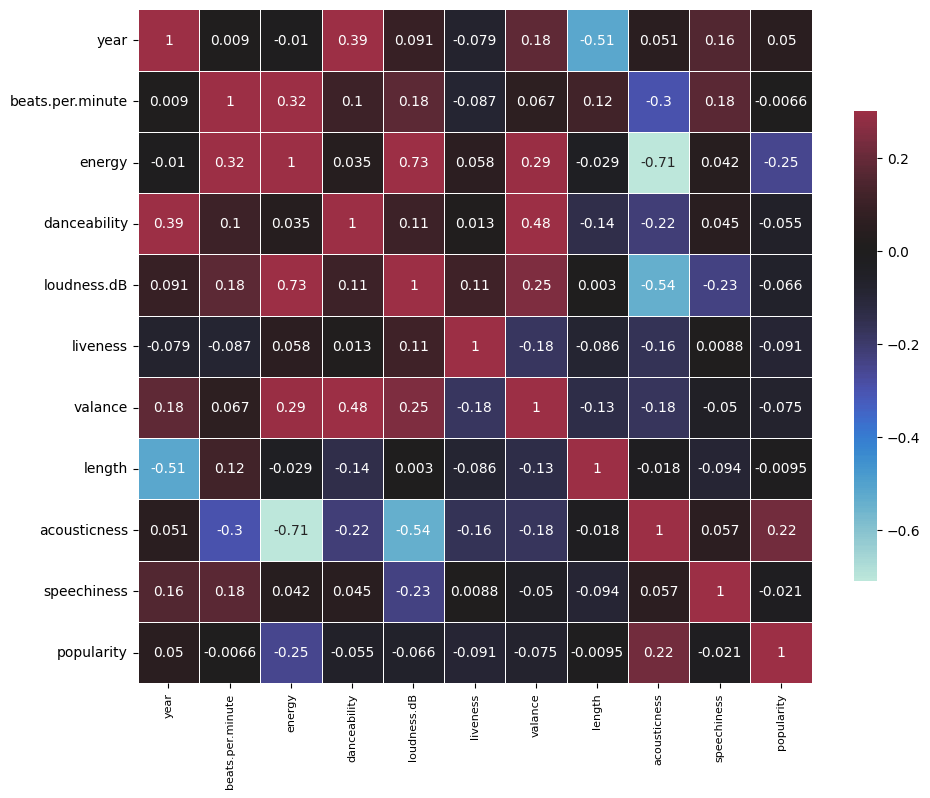

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 99
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             88 non-null     object
 1   artist            88 non-null     object
 2   top_genre         88 non-null     object
 3   year              88 non-null     int64 
 4   beats.per.minute  88 non-null     int64 
 5   energy            88 non-null     int64 
 6   danceability      88 non-null     int64 
 7   loudness.dB       88 non-null     int64 
 8   liveness          88 non-null     int64 
 9   valance           88 non-null     int64 
 10  length            88 non-null     int64 
 11  acousticness      88 non-null     int64 
 12  speechiness       88 non-null     int64 
 13  popularity        88 non-null     int64 
 14  genre_class       88 non-null     int64 
dtypes: int64(12), object(3)
memory usage: 11.0+ KB


In [22]:
df2.genre_class.value_counts()

0    57
1    18
2     7
3     6
Name: genre_class, dtype: int64

In [23]:
df2.describe()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,genre_class
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2016.147727,114.318182,61.897727,68.045455,-6.193182,17.534091,49.909091,212.477273,25.431818,10.068182,79.681818,0.568182
std,5.156270,24.846908,16.426107,13.660000,2.050276,13.634767,21.559134,37.138751,26.168682,9.659485,5.962614,0.907130
min,1975.000000,71.000000,11.000000,35.000000,-14.000000,3.000000,6.000000,119.000000,0.000000,2.000000,53.000000,0.000000
25%,2015.000000,95.000000,51.000000,60.750000,-7.000000,10.000000,34.000000,187.000000,4.000000,4.000000,79.000000,0.000000
50%,2017.000000,114.000000,62.000000,72.000000,-6.000000,12.000000,48.000000,207.000000,14.000000,6.000000,81.000000,0.000000
75%,2018.000000,134.000000,75.000000,78.000000,-5.000000,18.000000,65.250000,234.000000,44.000000,11.000000,83.000000,1.000000
max,2021.000000,171.000000,92.000000,91.000000,-3.000000,79.000000,93.000000,354.000000,98.000000,46.000000,88.000000,3.000000


# SPLIT THE DATASET INTO TRAIN AND TEST SET

In [24]:
#Splitting data
import sklearn
from sklearn.model_selection import train_test_split

# head of the data
print(df2.head())

x = df2.loc[:,'beats.per.minute':'popularity']
y = df2.loc[:,'genre_class']

print(x.shape,y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)



                    title           artist    top_genre  year  \
1        Watermelon Sugar     Harry Styles          pop  2019   
2  Mood (feat. iann dior)         24kGoldn     cali rap  2021   
3       Someone You Loved    Lewis Capaldi          pop  2019   
4                 Perfect       Ed Sheeran          pop  2017   
5                Believer  Imagine Dragons  modern rock  2017   

   beats.per.minute  energy  danceability  loudness.dB  liveness  valance  \
1                95      82            55           -4        34       56   
2                91      72            70           -4        32       73   
3               110      41            50           -6        11       45   
4                95      45            60           -6        11       17   
5               125      78            78           -4         8       67   

   length  acousticness  speechiness  popularity  genre_class  
1     174            12            5          88            0  
2     141         

# MODEL & TECHNIQUE AND EVALUATION 

**The models with using accuracy and confusion matrix as the evaluation method**

**1.Decision Tree**

In [25]:
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_predict = dt.predict(x_test)
print(metrics.accuracy_score(y_test,y_predict))

0.5555555555555556


**2.SVM**

In [26]:
# ended up not using

# from sklearn.svm import LinearSVC

# clf = LinearSVC().fit(x_train, y_train)
# print('spotify dataset')
# print('Accuracy of Linear SVC classifier on training set: {:.2f}'
#      .format(clf.score(x_train, y_train)))
# print('Accuracy of Linear SVC classifier on test set: {:.2f}'
#      .format(clf.score(x_test, y_test)))

In [27]:
svm_linear=SVC(kernel='linear', C=100,gamma=100,probability=True).fit(x_train, y_train)
svm_linear.score(x_test,y_test)

0.8148148148148148

In [28]:
svm_poly=SVC(kernel='poly', C=100,gamma=100,probability=True).fit(x_train, y_train)
svm_poly.score(x_test,y_test)

0.6296296296296297

In [29]:
svm_sigmoid=SVC(kernel='sigmoid', C=2,gamma=3,probability=True).fit(x_train, y_train)
svm_sigmoid.score(x_test,y_test)

0.7777777777777778

**3.KNN**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

knn = KNeighborsClassifier(n_neighbors=54)
knn.fit(x_train,y_train)
knn.predict(x_test)
accuracy_score = knn.score(x_test,y_test) 
print("Accuracy score of test is ""{:.3f}".format(accuracy_score))







Accuracy score of test is 0.778


In [31]:
np.array(y_test)

array([0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1,
       3, 0, 0, 0, 0], dtype=int64)

In [32]:
#Predict the response for test dataset
y_pred = svm_poly.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 2, 3, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       3, 0, 0, 0, 0], dtype=int64)

In [33]:
y_pred = svm_linear.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0], dtype=int64)

In [34]:
y_pred = svm_sigmoid.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [35]:
y_pred = dt.predict(x_test)
y_pred

array([2, 0, 0, 0, 1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 2], dtype=int64)

In [36]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [37]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_log_error(y_test, y_pred))

plt.figure(figsize=(10,10))
sns.regplot(y_test, y_pred, fit_reg=True, scatter_kws={"s": 100})

-0.22727272727272685
0.2139655192241694


TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 1000x1000 with 0 Axes>

In [ ]:
df2.corr()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
 
# plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Predict data

**Predict the genre from dataset**

In [ ]:
df2.loc[[3]]

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
res = dt.predict(x_test.loc[[3]])
res

In [ ]:
res = svm_linear.predict(x_test.loc[[3]])
res

In [ ]:
res = svm_sigmoid.predict(x_test.loc[[3]])
res

In [ ]:
res = svm_poly.predict(x_test.loc[[3]])
res

In [ ]:
res = knn.predict(x_test.loc[[3]])
res

**Predict genre from dummy data**

In [ ]:
column_names = x_test.columns.values.tolist()

In [ ]:
column_names

In [ ]:
data = {
 'beats.per.minute' :[100],
 'energy' :[85],
 'danceability' :[75],
 'loudness.dB' :[-4],
 'liveness' :[9],
 'valance' :[70],
 'length' :[207],
 'acousticness' :[7],
 'speechiness' :[18],
 'popularity' :[86],

}

In [ ]:
df_test = pd.DataFrame(data)

In [ ]:
df_test

In [ ]:
res = dt.predict(df_test)
res

In [ ]:
res = svm_linear.predict(df_test)
res

In [ ]:
res = svm_sigmoid.predict(df_test)
res

In [ ]:
res = svm_poly.predict(df_test)
res

In [ ]:
res = knn.predict(df_test)
res

In [ ]:
data = {
 'beats.per.minute' :[114],
 'energy' :[62],
 'danceability' :[68],
 'loudness.dB' :[-6],
 'liveness' :[17],
 'valance' :[50],
 'length' :[212],
 'acousticness' :[25],
 'speechiness' :[10],
 'popularity' :[80]
}
df_test = pd.DataFrame(data)
df_test

In [ ]:
res = dt.predict(df_test)
res

In [ ]:
res0 = svm_linear.predict(df_test)
res0

In [ ]:
res1 = svm_sigmoid.predict(df_test)
res1

In [ ]:
res2 = svm_poly.predict(df_test)
res2

In [ ]:
res3 = knn.predict(df_test)
res3